# logistics company analytics in Nairobi
Dispatch Data 
●	ID - Unique ID for each order request 
●	order_id – Unique number identifying the order 
●	client_id - Unique number identifying the customer on a platform 
●	client_type - Specifies the customer type (Business or Personal) 
●	rider_id - Unique number to uniquely identify the rider 
●	rider_license_status - Identifies riders who have a license to access restricted areas i.e. 0 (Cannot access a restricted area) and 1 (Can access a restricted area) 
●	rider_carrier_type - Identifies the box option that a rider currently has i.e. 0 (No Box option) and 1 (Box option) 
●	rider_amount - The earnings a partner would earn if they successfully complete an order. 
●	order_license_status - Identifies orders that require a pick-up or drop-off in a restricted area 
i.e. 0 (Restricted area) and 1 (Non-Restricted area) 
●	order_carrier_type - Identifies the box option the customer specified while placing their orders 
i.e. 0 (No box option), 1 (Box option), 2 (Any option) 
●	vendor_type – For this competition limited to bikes. However, in practice, Sample Delivery Company’s service extends to Vans and Trucks. 
●	Pickup Latitude and Longitude (pickup_lat and pickup_long) - Latitude and longitude of pick up location 
●	Destination Latitude and Longitude (drop_off_lat and drop_off_long) - 
Latitude and longitude of delivery location 
●	Rider Latitude and Longitude (rider_lat and rider_long) - Latitude and longitude of the Rider at the time of dispatch. 
●	target - The reaction of a rider in regards to a particular dispatch. Did a rider ignore (0), decline 
(1) or accept (2) a dispatch? 

Dispatch times 
●	dispatch_day - Day of Month i.e. 1-31 
●	dispatch_day_of_week - Weekday (Monday = 1) 
●	dispatch_time - Time of day the dispatch was sent out to the riders 



In [1]:
import numpy as np
import pandas as pd
import re
import time
import sys
import os
import time
import calendar

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from itertools import islice
from configparser import ConfigParser
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

In [2]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import decomposition
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train=pd.read_csv("C:/Users/kachase/Downloads/ICEA LION Data Scientist Assessment and Case Study/Train.csv")
test= pd.read_csv("C:/Users/kachase/Downloads/ICEA LION Data Scientist Assessment and Case Study/test.csv")
submission= pd.read_csv("C:/Users/kachase/Downloads/ICEA LION Data Scientist Assessment and Case Study/SubmissionExample.csv")


In [5]:
train.head()

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,...,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target
0,ID_SCUW21PVAU,4435,27,6,9:02:54,593630,Business,0,2,Bike,...,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1
1,ID_2HA7X30JMN,32711,30,7,13:01:37,837729,Personal,0,1,Bike,...,0,1,730,-42.787317,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,2
2,ID_IAJWDTBY6M,8712,14,2,10:01:00,695129,Personal,0,2,Bike,...,1,1,490,-42.749180,-17.287848,-42.765204,-17.293784,-42.813953,-17.294805,1
3,ID_LKSVPNYMTR,44869,22,3,14:11:16,1504660,Personal,0,2,Bike,...,1,1,510,-42.836266,-17.311920,-42.831913,-17.315311,-42.812409,-17.265441,2
4,ID_O7N8Y918YH,57590,27,5,16:11:38,36869,Business,0,2,Bike,...,0,0,400,-42.828195,-17.322818,-42.836056,-17.318111,-42.828517,-17.302052,0


In [6]:
train.shape

(179867, 21)

In [7]:
train.shape

(179867, 21)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179867 entries, 0 to 179866
Data columns (total 21 columns):
ID                      179867 non-null object
order_id                179867 non-null int64
dispatch_day            179867 non-null int64
dispatch_day_of_week    179867 non-null int64
dispatch_time           179867 non-null object
client_id               179867 non-null int64
client_type             179867 non-null object
order_license_status    179867 non-null int64
order_carrier_type      179867 non-null int64
vendor_type             179867 non-null object
rider_id                179867 non-null int64
rider_license_status    179867 non-null int64
rider_carrier_type      179867 non-null int64
rider_amount            179867 non-null int64
rider_lat               179867 non-null float64
rider_long              179867 non-null float64
pickup_lat              179867 non-null float64
pickup_long             179867 non-null float64
drop_off_lat            179867 non-null float64
d

In [9]:
train.isnull().sum().any()


False

In [10]:
train.nunique()

ID                      179867
order_id                 58848
dispatch_day                31
dispatch_day_of_week         7
dispatch_time             5636
client_id                 5141
client_type                  2
order_license_status         2
order_carrier_type           3
vendor_type                  1
rider_id                   764
rider_license_status         2
rider_carrier_type           2
rider_amount               177
rider_lat               156002
rider_long              154548
pickup_lat                7633
pickup_long               7655
drop_off_lat             12172
drop_off_long            12213
target                       3
dtype: int64

In [78]:
train.target.value_counts()

0    98343
1    45623
2    35901
Name: target, dtype: int64

In [12]:
train.client_type.value_counts()


Business    145902
Personal     33965
Name: client_type, dtype: int64

# feature engineering

In [13]:
#convert dispatch_time to dateand time
train["dispatch_time"]= pd.to_datetime(train["dispatch_time"])
#convert dispatch_time to dateand time
test["dispatch_time"]= pd.to_datetime(test["dispatch_time"])

In [14]:
#extract hour
train['hour']= train['dispatch_time'].apply(lambda row:row.hour)
#extract hour
test['hour']= test['dispatch_time'].apply(lambda row:row.hour)

In [15]:
#distance from driver to pick up
def haversine(lat1, lon1, lat2, lon2):
    import math
    R = 6373.0 
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    return R *2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))


In [16]:
#Distance from the rider to the pickup location
train['pickup_d'] = pd.concat([train.add_suffix('_pre').shift(), train], axis=1).apply(lambda x: haversine(x['rider_lat'], x['rider_long'], x['pickup_lat'], x['pickup_long']), axis=1)

#Distance from the rider to the pickup location
train['drop_d'] = pd.concat([train.add_suffix('_pre').shift(), train], axis=1).apply(lambda x: haversine(x['rider_lat'], x['rider_long'], x['drop_off_lat'], x['drop_off_long']), axis=1)

#Distance from the rider to the pickup location
train['trip_d'] = pd.concat([train.add_suffix('_pre').shift(), train], axis=1).apply(lambda x: haversine(x['drop_off_lat'], x['drop_off_long'], x['pickup_lat'], x['pickup_long']), axis=1)

In [17]:
#Distance from the rider to the pickup location
test['pickup_d'] = pd.concat([test.add_suffix('_pre').shift(), test], axis=1).apply(lambda x: haversine(x['rider_lat'], x['rider_long'], x['pickup_lat'], x['pickup_long']), axis=1)

#Distance from the rider to the pickup location
test['drop_d'] = pd.concat([test.add_suffix('_pre').shift(), test], axis=1).apply(lambda x: haversine(x['rider_lat'], x['rider_long'], x['drop_off_lat'], x['drop_off_long']), axis=1)

#Distance from the rider to the pickup location
test['trip_d'] = pd.concat([test.add_suffix('_pre').shift(), test], axis=1).apply(lambda x: haversine(x['drop_off_lat'], x['drop_off_long'], x['pickup_lat'], x['pickup_long']), axis=1)

In [18]:
train.head().T

,0,1,2,3,4
ID,ID_SCUW21PVAU,ID_2HA7X30JMN,ID_IAJWDTBY6M,ID_LKSVPNYMTR,ID_O7N8Y918YH
order_id,4435,32711,8712,44869,57590
dispatch_day,27,30,14,22,27
dispatch_day_of_week,6,7,2,3,5
dispatch_time,2021-12-14 09:02:54,2021-12-14 13:01:37,2021-12-14 10:01:00,2021-12-14 14:11:16,2021-12-14 16:11:38
client_id,593630,837729,695129,1504660,36869
client_type,Business,Personal,Personal,Personal,Business
order_license_status,0,0,0,0,0
order_carrier_type,2,1,2,2,2
vendor_type,Bike,Bike,Bike,Bike,Bike


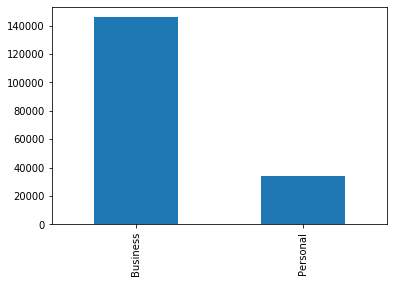

In [19]:
# plot number of trip at each category
x = train['client_type'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Dispatches per hour')

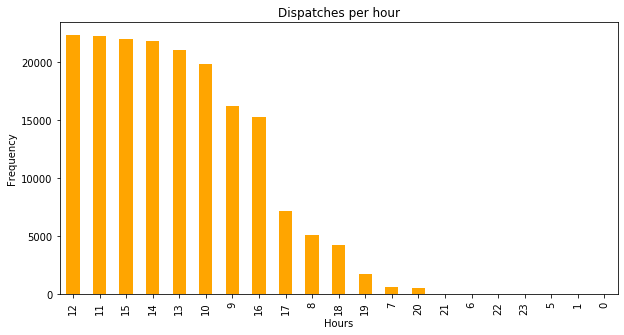

In [20]:
# I need to see how many dispatches made at each clock and as you see the clock which has the higest number of trips is 3:00PM
hours = train.hour.value_counts()
hours.plot(kind='bar',color='orange',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Dispatches per hour')

Text(0.5, 1.0, 'Dispatches given a day')

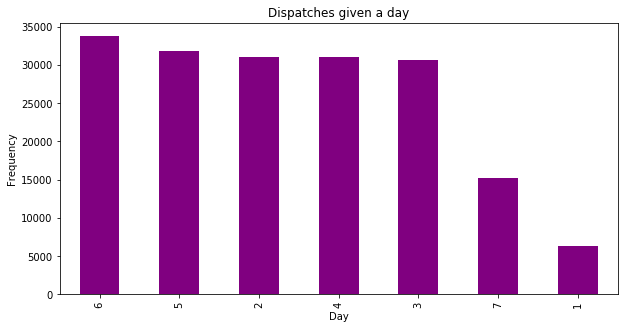

In [21]:
days=train['dispatch_day_of_week'].value_counts()
days.plot(kind='bar',color='purple',figsize=(10,5))
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Dispatches given a day')

# rush hours and days

In [22]:
train_rush_day_hour = train.groupby(['dispatch_day_of_week', 'hour'])['dispatch_time'].count().reset_index()
train_rush_day_hour.columns=['Day of week','Hour','Trips']
train_rush_day_hour.head()

,Day of week,Hour,Trips
0,1,6,2
1,1,7,16
2,1,8,118
3,1,9,361
4,1,10,575


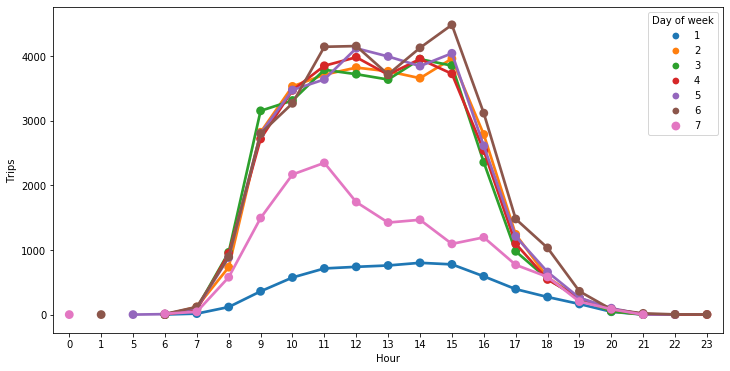

In [23]:
plt.figure(figsize=(12,6))
sns.pointplot(x=train_rush_day_hour['Hour'],y=train_rush_day_hour['Trips'],hue=train_rush_day_hour['Day of week'])

In [24]:
#I want to see the pickup locations that are frequent
demand=(train.groupby(['pickup_lat','pickup_long']).count()['dispatch_day']).reset_index()
demand.columns=['Latitude','Longitude','number_of_trips']
demand.sort_values(by=['number_of_trips'],ascending=False)


,Latitude,Longitude,number_of_trips
2727,-42.827513,-17.299970,11939
5822,-42.787833,-17.257167,5763
5736,-42.789108,-17.298525,5323
2025,-42.836056,-17.318111,4912
2596,-42.828517,-17.302052,3616
2107,-42.833756,-17.317300,3388
6088,-42.783019,-17.296577,2817
6272,-42.779153,-17.257836,2576
3491,-42.821691,-17.281493,2546
4324,-42.809398,-17.268056,2348


# RIDERS 

In [25]:
riders=pd.read_csv("C:/Users/kachase/Downloads/ICEA LION Data Scientist Assessment and Case Study/Riders.csv")

In [26]:
riders.head()

,Rider ID,Active Rider Age,Average Partner Rating,Number of Ratings
0,16261,308,21.05,321
1,8832,224,10.00,27
2,53866,238,17.76,25
3,46368,343,24.56,320
4,45609,399,14.97,214


In [27]:
riders.shape

(2632, 4)

In [28]:
riders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 4 columns):
Rider ID                  2632 non-null int64
Active Rider Age          2632 non-null int64
Average Partner Rating    2632 non-null float64
Number of Ratings         2632 non-null int64
dtypes: float64(1), int64(3)
memory usage: 82.3 KB


In [29]:
riders.rename(columns = {'Rider ID':'rider_id','Active Rider Age':'rider_age','Average Partner Rating':'avg_partner_rating','Number of Ratings':'ratings_total'},inplace = True)

In [30]:
riders.head()

,rider_id,rider_age,avg_partner_rating,ratings_total
0,16261,308,21.05,321
1,8832,224,10.00,27
2,53866,238,17.76,25
3,46368,343,24.56,320
4,45609,399,14.97,214


In [31]:
riders.describe()

,rider_id,rider_age,avg_partner_rating,ratings_total
count,2632.000000,2632.000000,2632.000000,2632.000000
mean,73738.323328,44.490881,17.530015,133.109422
std,28424.105449,63.154074,5.185067,118.880935
min,805.000000,0.000000,1.000000,0.000000
25%,54803.250000,3.000000,14.440000,33.000000
50%,74025.500000,14.000000,18.535000,105.500000
75%,98376.750000,62.000000,21.662500,205.000000
max,123694.000000,399.000000,24.990000,637.000000


# MERGING THE DATASETS

In [32]:
train.shape

(179867, 25)

In [33]:
data  = pd.merge(train,riders, on='rider_id',how='left')
test  = pd.merge(test,riders, on='rider_id',how='left')


In [34]:
data.head()
test.head()

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,...,pickup_long,drop_off_lat,drop_off_long,hour,pickup_d,drop_d,trip_d,rider_age,avg_partner_rating,ratings_total
0,ID_3B4D2Q2DSI,28636,2,6,2021-12-14 12:10:59,593630,Business,0,2,Bike,...,-17.280865,-42.880476,-17.230240,12,202.093540,231.281586,146.273809,175,23.04,15
1,ID_7MPWFJ9XFI,60465,11,4,2021-12-14 17:10:03,2378775,Personal,1,2,Bike,...,-17.279453,-42.851920,-17.314558,17,19.472398,150.882854,170.281295,8,19.34,332
2,ID_5VVT3Q3M5B,25249,30,3,2021-12-14 12:02:01,2121681,Personal,0,2,Bike,...,-17.291086,-42.807165,-17.253860,12,32.052733,76.967305,94.900412,105,10.00,3
3,ID_C2GTVS1H7K,21224,27,2,2021-12-14 11:10:32,38801,Business,0,2,Bike,...,-17.302052,-42.795516,-17.287921,11,0.575573,212.725556,213.219870,38,24.76,83
4,ID_0YGC8V3PFT,58287,14,6,2021-12-14 16:12:55,153111,Business,0,2,Bike,...,-17.262939,-42.706475,-17.257454,16,25.047260,652.852926,628.987836,167,9.15,16


In [35]:
data.shape,data.size

((179867, 28), 5036276)

In [36]:
data.isna().sum().any()

False

In [37]:
pd.options.display.float_format = '{:.2f}'.format
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,179867.00,32639.83,18227.43,100.00,16875.00,32964.00,48117.00,64427.00
dispatch_day,179867.00,16.60,8.53,1.00,9.00,17.00,24.00,31.00
dispatch_day_of_week,179867.00,4.19,1.68,1.00,3.00,4.00,6.00,7.00
client_id,179867.00,465410.75,663423.43,261.00,75647.00,143428.00,593630.00,2568456.00
order_license_status,179867.00,0.24,0.43,0.00,0.00,0.00,0.00,1.00
order_carrier_type,179867.00,1.62,0.54,0.00,1.00,2.00,2.00,2.00
rider_id,179867.00,70389.97,33981.81,1817.00,40756.00,73485.00,100441.00,123694.00
rider_license_status,179867.00,0.59,0.49,0.00,0.00,1.00,1.00,1.00
rider_carrier_type,179867.00,0.87,0.34,0.00,1.00,1.00,1.00,1.00
rider_amount,179867.00,517.54,157.39,200.00,410.00,460.00,570.00,2190.00


In [38]:
data= data.drop(columns = ['ID','dispatch_time', 'rider_lat','rider_long','pickup_lat', 'pickup_long', 'drop_off_lat', 'drop_off_long'])


In [39]:
test= test.drop(columns = ['dispatch_time', 'rider_lat','rider_long','pickup_lat', 'pickup_long', 'drop_off_lat', 'drop_off_long'])


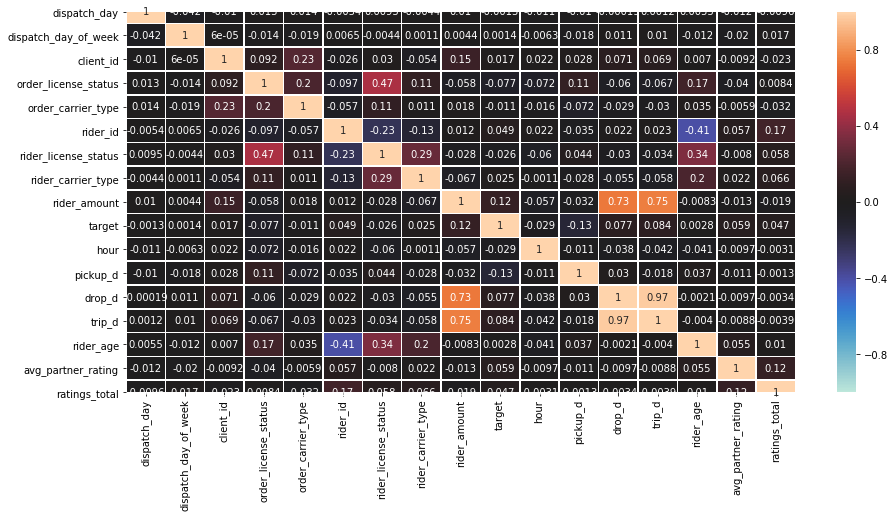

In [40]:
all_col = data.iloc[:,1:].columns.tolist()
plt.figure(figsize=(15,7))
sns.heatmap(data[all_col].corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,)
plt.show()

In [41]:

numerical_features=['ID', 'order_id', 'dispatch_day', 'dispatch_day_of_week',
       'dispatch_time', 'client_id', 'order_license_status',
       'order_carrier_type', 'rider_id', 'rider_license_status',
       'rider_carrier_type', 'rider_amount', 'rider_lat', 'rider_long',
       'pickup_lat', 'pickup_long', 'drop_off_lat', 'drop_off_long', 'target',
       'hour', 'pickup_d', 'drop_d', 'trip_d', 'rider_age',
       'avg_partner_rating', 'ratings_total']

In [42]:
features = data.copy()

In [43]:
data.head()

,order_id,dispatch_day,dispatch_day_of_week,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,target,hour,pickup_d,drop_d,trip_d,rider_age,avg_partner_rating,ratings_total
0,4435,27,6,593630,Business,0,2,Bike,30153,0,1,1080,1,9,51.89,353.44,310.13,11,10.00,1
1,32711,30,7,837729,Personal,0,1,Bike,20884,0,1,730,2,13,21.29,734.45,714.31,68,24.13,229
2,8712,14,2,695129,Personal,0,2,Bike,33143,1,1,490,1,10,102.92,413.11,310.69,273,24.92,123
3,44869,22,3,1504660,Personal,0,2,Bike,96531,1,1,510,2,14,29.13,192.94,177.58,168,23.76,175
4,57590,27,5,36869,Business,0,2,Bike,103546,0,0,400,0,16,51.57,53.62,63.69,95,24.53,42


# Encoding categorical features

In [44]:
#casting the columns into strings
cat_features=['client_type','vendor_type']


data_processed = pd.get_dummies(data, prefix_sep="__",
                              columns=cat_features)

data_processed.columns

#test=pd.get_dummies(test, columns=['vendor_type','client_type']).head()


Index(['order_id', 'dispatch_day', 'dispatch_day_of_week', 'client_id',
       'order_license_status', 'order_carrier_type', 'rider_id',
       'rider_license_status', 'rider_carrier_type', 'rider_amount', 'target',
       'hour', 'pickup_d', 'drop_d', 'trip_d', 'rider_age',
       'avg_partner_rating', 'ratings_total', 'client_type__Business',
       'client_type__Personal', 'vendor_type__Bike'],
      dtype='object')

In [45]:
#casting the columns into strings
cat_features=['client_type','vendor_type']


test_processed = pd.get_dummies(test, prefix_sep="__",
                              columns=cat_features)

test_processed.columns

#test=pd.get_dummies(test, columns=['vendor_type','client_type']).head()


Index(['ID', 'order_id', 'dispatch_day', 'dispatch_day_of_week', 'client_id',
       'order_license_status', 'order_carrier_type', 'rider_id',
       'rider_license_status', 'rider_carrier_type', 'rider_amount', 'hour',
       'pickup_d', 'drop_d', 'trip_d', 'rider_age', 'avg_partner_rating',
       'ratings_total', 'client_type__Business', 'client_type__Personal',
       'vendor_type__Bike'],
      dtype='object')

# Scaling data

In [46]:
input_features = numerical_features + cat_features

In [47]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data_processed)


# Model selection

In [48]:
# Separating the target variable
#
target = data_processed.target



In [49]:
# Installing catboost
!pip install catboost==0.20.2

In [62]:
# Using different models to find the optimal model
#
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import mean_squared_error
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
 




In [66]:
# Using the top three models; XGBoost, Catboost and Gradientboost to train and make predictions
# Creating a list of models to use
#models = [XGBClassifier(), CatBoostClassifier(logging_level='Silent'), GradientBoostingClassifier()]
#model_names = ['xgboost', 'catboost', 'gradientboost']

# Selecting the training features and the target feature
X = data_processed.drop('target', axis = 1)
y = target
# Submission dataset
sub = test_processed.drop('ID', axis = 1)

# Using a for loop to create a submission file for each model

#for model, model_name in zip(models, model_names):
 # classifier = model                      # instantiating the model
model=XGBClassifier()
model.fit(X,y)                    # Training the model
predictions  = model.predict(sub)  # Making predictions
pred=pd.DataFrame(predictions)
submission_df=pd.concat([submission['ID'],pred],axis=1)
submission_df.columns=['ID','Target']
datasets.to_csv('submission.csv', index=False)
  #submission_df = pd.DataFrame({'ID': test.ID, 'target': predictions}) # Creating a submission file
  #submission_df.to_csv(model_name + '_baseline.csv', index = False)

[21:17:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [72]:
submission=pd.read_csv('submission.csv')

In [75]:
submission.Target.value_counts()

0    64361
1     6540
2     5890
Name: Target, dtype: int64

In [80]:
model.score(X,y)

0.66175007088571

In [81]:
model.score(sub,predictions)

1.0